$$ \Large \underline
{\textbf{Problema 1}}
$$

Determine los desplazamientos de los bordes libres y los esfuerzos en función de la posición para la
placa empotrada mostrada en la figura. Tome las dos particiones en elementos mostradas debajo y
compare los resultados. Asuma que E = 30 x 10e6
 psi y $n = 0.30$.

<center><img src="ImgProb01aG03.png"></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import MEF as mef

In [2]:
L = 20  # in
h = 10  # in
v = 0.3  # coef Poisson
E = np.array([30e6,30e6])  # psi
t = 1  # in

In [3]:
MN = np.array([
        [0,0,0],
        [0,h,0],
        [L,h,0],
        [L,0,0]])

# Se resuelve igual que la teórica para comparar resultados
MC = np.array([[0,2,1],[0,3,2]])

In [4]:
glxn = 2
dimension_elementos = 2

In [5]:
Ne, Nnxe = MC.shape
Nn = MN.shape[0]

In [6]:
K, Ke, D, B = mef.Kglobal_barra(MN, MC, E, glxn, dimension_elementos, v,t) 

In [7]:
s = np.array([0,1,2,3])
r = mef.vector_complemento(s, MN, glxn)

Us = np.array([0,0,0,0]).reshape([-1,1])
Fr = np.array([5000,0,5000,0]).reshape([-1,1])  # lb

In [8]:
F, U = mef.solve(K, r, s, Us, Fr)

In [9]:
sig = {}
d = {}
for e in range(Ne):
    nodo = MC[e,:]
    d[e] = np.array([U[nodo[0]*glxn],U[nodo[0]*glxn+1],
                     U[nodo[1]*glxn],U[nodo[1]*glxn+1],
                     U[nodo[2]*glxn],U[nodo[2]*glxn+1]]).reshape([-1,1])
    sig[e] = D[e].dot(B[e].dot(d[e]))

In [10]:
np.set_printoptions(formatter={"float": lambda x: "%0.5f"% (x)})
print('\033[4m'+f'\nTensiones en x, y, xy de cada barra'+'\033[0m'+' [psi]:')
for e in range(Ne):
    print('\033[93m'+f'Elemento {e}:\n {sig[e]}'+'\033[0m')


Tensiones en x, y, xy de cada barra [psi]:
Elemento 0:
 [[1004.80384]
 [301.44115]
 [2.40192]]
Elemento 1:
 [[995.19616]
 [-1.20096]
 [-2.40192]]


In [11]:
U2D = U.reshape(Nn,glxn)
U3D = np.append(U2D,np.zeros(U2D.shape[0]).reshape([-1,1]),1)
print('\n\033[4m'+f'Desplazamientos x, y, e z de cada nodo'+'\033[0m'+' [in x 10^6]:')
for n in range(Nn):
    print('\033[93m'+f'Nodo {n}: {U3D[n]*1e6}'+'\033[0m')


Desplazamientos x, y, e z de cada nodo [in x 10^6]:
Nodo 0: [0.00000 0.00000 0.00000]
Nodo 1: [0.00000 0.00000 0.00000]
Nodo 2: [609.58100 4.16333 0.00000]
Nodo 3: [663.70430 104.08327 0.00000]


In [14]:
MNdef = MN + U3D*1e4

Text(0.5, 0, 'desplazamiento en x')

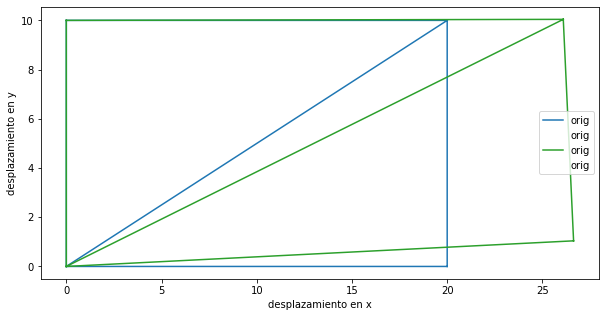

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
plt.triplot(MN[:,0], MN[:,1], MC, label='orig')
plt.triplot(MNdef[:,0], MNdef[:,1], MC, label='orig')
plt.legend()
plt.ylabel('desplazamiento en y')
plt.xlabel('desplazamiento en x')